# KELOMPOK A21-9

## Nama Anggota :
### 2109106013_Bramantyo Ardi Harimurti Wibisono 
### 2109106017_Fitra Noviarji

# Mengestract file

In [277]:
import zipfile
import os

In [278]:
# os.mkdir('dataset')
dataset_dir = 'dataset'

In [279]:
#Ekstract File
# target_file='cobaa.zip'

# extracting = zipfile.ZipFile(target_file, 'r')

# extracting.extractall(dataset_dir) 

# extracting.close()

# Import Library

In [280]:
import pathlib
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import Adam 
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# menentukan direktori

In [281]:
bahan_dir = os.path.join(dataset_dir, 'bahan')
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')


In [282]:
#direktori Dataset
Pebbels_dir = os.path.join(bahan_dir, 'Pebbels')
pliers_dir = os.path.join(bahan_dir, 'pliers')
Rope_dir = os.path.join(bahan_dir, 'Rope')

In [283]:
# Train Direktori
train_Pebbels = os.path.join(train_dir, 'Pebbels')
train_pliers = os.path.join(train_dir, 'pliers')
train_Rope = os.path.join(train_dir, 'Rope')

#validation direktori
validation_Pebbels = os.path.join(validation_dir, 'Pebbels')
validation_pliers = os.path.join(validation_dir, 'pliers')
validation_Rope = os.path.join(validation_dir, 'Rope'

# melihat isi banyak file

In [284]:
print('Jumlah all Pebbels     :', len(os.listdir(Pebbels_dir)))
print('Jumlah all pliers      :', len(os.listdir(pliers_dir)))
print('Jumlah all Rope        :', len(os.listdir(Rope_dir)))

Jumlah all Pebbels     : 495
Jumlah all pliers      : 252
Jumlah all Rope        : 252


# Data Analysis

### 1.Data Train

In [285]:
dataset_train = image_dataset_from_directory(
    'dataset/train/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (64, 64),
    shuffle = True, 
    seed = 47,
)

Found 798 files belonging to 3 classes.


### 2.Data Validation

In [286]:
dataset_validation = image_dataset_from_directory(
    'dataset/validation/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (64, 64),
    shuffle = True, 
    seed = 47,
)

Found 201 files belonging to 3 classes.


In [318]:
class_names = ['Pebbels', 'Rope', 'pliers']
class_names

['Pebbels', 'Rope', 'pliers']

# Preprocessing

## Data spliting

In [288]:
import splitfolders

In [289]:
#splitfolders.ratio("bahan", output = "Dataset", seed =1337, ratio = (.8, .2), group_prefix = None)

In [302]:
train_dir = dataset_dir + "/train"
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    fill_mode='nearest')

validation_dir = dataset_dir + "/validation"
validation_datagen = ImageDataGenerator(rescale=1./255)

In [309]:
train_generator = train_datagen.flow_from_directory(
  directory=train_dir,   
  target_size=(128,128), 
  class_mode='categorical',  
  shuffle=True,
  batch_size=64)

validation_generator = validation_datagen.flow_from_directory(
  directory=validation_dir,  
  target_size=(128,128),  
  class_mode='categorical',
  shuffle=True,
  batch_size=64)
     

Found 798 images belonging to 3 classes.
Found 201 images belonging to 3 classes.


## Pratinjau Gambar

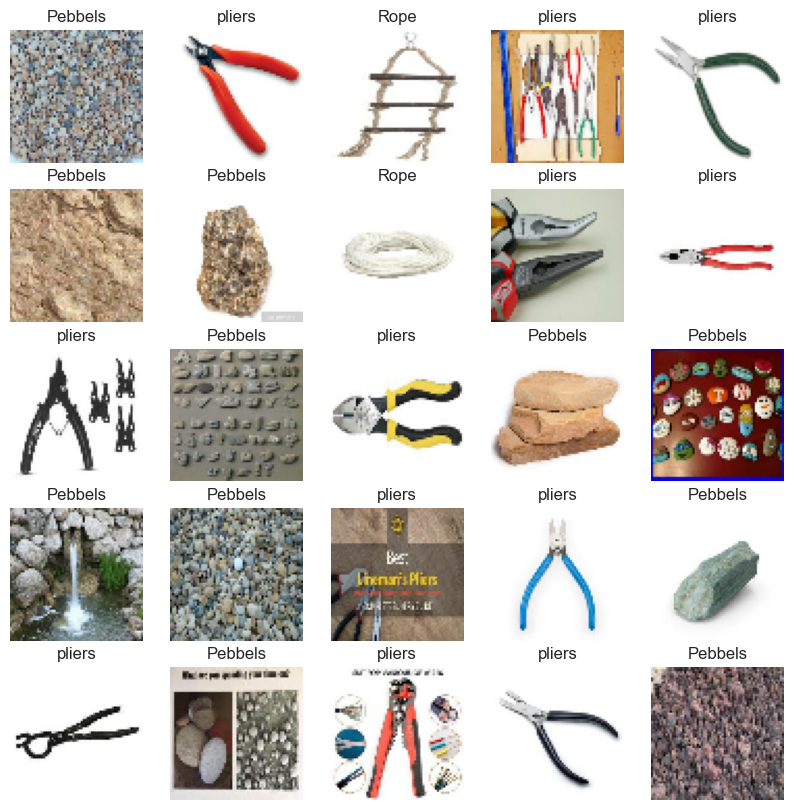

In [304]:
plt.figure(figsize = (10, 10))
for images, labels in dataset_train.take(1):
    for i in range (25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

# Data Modeling

## Model

In [292]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [297]:
model = Sequential([
    Conv2D(256, (3,3), activation='relu', input_shape=[128,128,3]),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(3, activation= 'softmax')
    ]
)

In [298]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 63, 63, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 14, 14, 128)    

## Optimasi model

In [299]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit

In [300]:
hasil = model.fit(train_generator, validation_data = validation_generator, epochs=15, verbose=1)

Epoch 1/15
13/13 [==============================] - 165s 12s/step - loss: 1.3571 - accuracy: 0.3972 - val_loss: 1.0879 - val_accuracy: 0.4925
Epoch 2/15
13/13 [==============================] - 145s 11s/step - loss: 1.0843 - accuracy: 0.4962 - val_loss: 1.0497 - val_accuracy: 0.4925
Epoch 3/15
13/13 [==============================] - 150s 12s/step - loss: 1.0464 - accuracy: 0.4887 - val_loss: 1.1215 - val_accuracy: 0.4925
Epoch 4/15
13/13 [==============================] - 173s 13s/step - loss: 0.9604 - accuracy: 0.5326 - val_loss: 0.8384 - val_accuracy: 0.5323
Epoch 5/15
13/13 [==============================] - 167s 13s/step - loss: 0.9107 - accuracy: 0.5301 - val_loss: 0.8560 - val_accuracy: 0.6368
Epoch 6/15
13/13 [==============================] - 181s 14s/step - loss: 0.8319 - accuracy: 0.6140 - val_loss: 0.7284 - val_accuracy: 0.6766
Epoch 7/15
13/13 [==============================] - 155s 12s/step - loss: 0.7614 - accuracy: 0.6366 - val_loss: 0.7130 - val_accuracy: 0.6617
Epoch 

 # Evaluasi

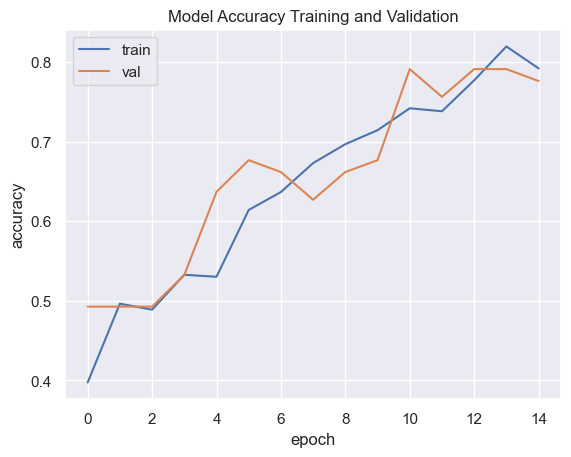

In [305]:
# Model Accuracy Train & val
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('Model Accuracy Training and Validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

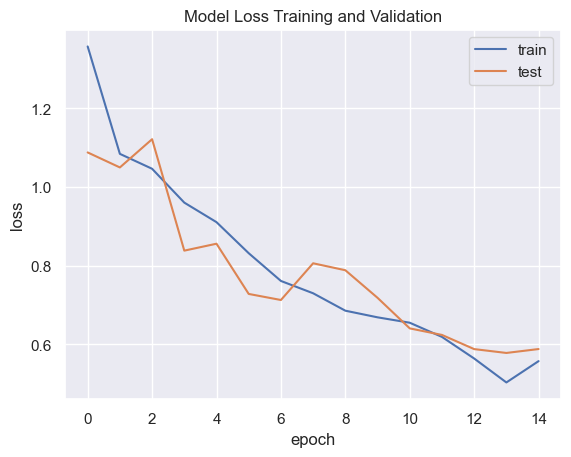

In [306]:
# model Loss train & val
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('Model Loss Training and Validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

# Predict Image

In [312]:
prediction = model.predict(train_generator)
label_pre = np.argmax(prediction, axis=1)

13/13 [==============================] - 48s 4s/step


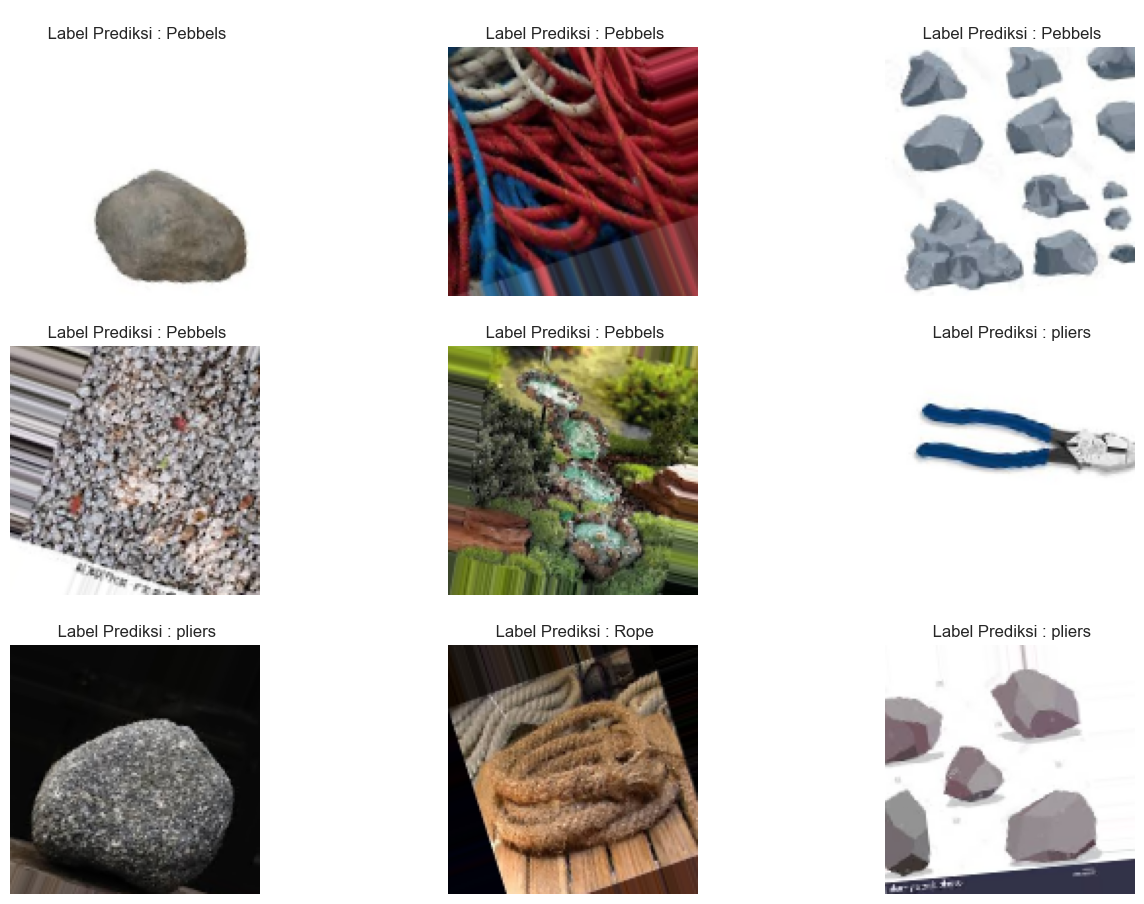

In [319]:
plt.figure(figsize=(16, 11))
for i in range (9):
    img, label = train_generator.next()
    actual_label = class_names[np.argmax(label[1])]
    plt.subplot(3, 3, i+1)
    plt.title(f"\n Label Prediksi : {class_names[label_pre[i]]}")
    plt.axis('off')
    plt.imshow(img[0])
plt.show()

# Save Model

In [320]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi model.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


14650556